# Kaggle - Titanic Survival

https://www.kaggle.com/c/titanic

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
my_data = pd.read_csv('train.csv', delimiter=',')

## Quick look at the raw data

In [5]:
my_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


 ## Mean average survival rate was 38%

In [6]:
my_data["Survived"].mean()

0.3838383838383838

In [7]:
my_data.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [8]:
my_data["Age"].mean()

29.69911764705882

## Survival rate by class & gender

In [9]:
class_sex_grouping = my_data.groupby(['Pclass','Sex']).mean()

In [10]:
class_sex_grouping

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
1      female   469.212766  0.968085  34.611765  0.553191  0.457447   
       male     455.729508  0.368852  41.281386  0.311475  0.278689   
2      female   443.105263  0.921053  28.722973  0.486842  0.605263   
       male     447.962963  0.157407  30.740707  0.342593  0.222222   
3      female   399.729167  0.500000  21.750000  0.895833  0.798611   
       male     455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Pclass Sex                 
1      female  106.125798  
       male     67.226127  
2      female   21.970121  
       male     19.741782  
3      female   16.118810  
       male     12.661633

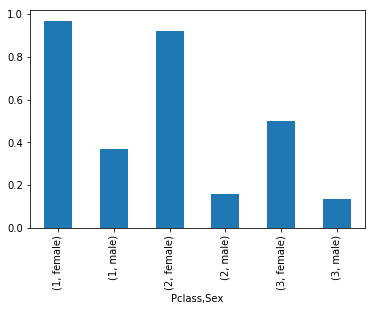

In [11]:
class_sex_grouping['Survived'].plot.bar()

In [12]:
from sklearn import tree

In [13]:
my_data.Sex.replace("male",1)

0           1
1      female
2      female
3      female
4           1
5           1
6           1
7           1
8      female
9      female
10     female
11     female
12          1
13          1
14     female
15     female
16          1
17          1
18     female
19     female
20          1
21          1
22     female
23          1
24     female
25     female
26          1
27          1
28     female
29          1
        ...  
861         1
862    female
863    female
864         1
865    female
866    female
867         1
868         1
869         1
870         1
871    female
872         1
873         1
874    female
875    female
876         1
877         1
878         1
879    female
880    female
881         1
882    female
883         1
884         1
885    female
886         1
887    female
888    female
889         1
890         1
Name: Sex, Length: 891, dtype: object

In [14]:
my_data.Sex.replace("female",0)

0      male
1         0
2         0
3         0
4      male
5      male
6      male
7      male
8         0
9         0
10        0
11        0
12     male
13     male
14        0
15        0
16     male
17     male
18        0
19        0
20     male
21     male
22        0
23     male
24        0
25        0
26     male
27     male
28        0
29     male
       ... 
861    male
862       0
863       0
864    male
865       0
866       0
867    male
868    male
869    male
870    male
871       0
872    male
873    male
874       0
875       0
876    male
877    male
878    male
879       0
880       0
881    male
882       0
883    male
884    male
885       0
886    male
887       0
888       0
889    male
890    male
Name: Sex, Length: 891, dtype: object

In [15]:
my_data = my_data.dropna()

In [16]:
my_data_labels  = my_data['Survived']

In [17]:
my_data_features = my_data[["Pclass", "Age", "Sex"]]

In [18]:
my_data_features = my_data_features.replace("female",0).replace("male",1).rename(index=lambda x: x + 1)

In [19]:
clf = tree.DecisionTreeClassifier()

In [20]:
clf = clf.fit(my_data_features, my_data_labels)

In [21]:
clf.predict([[2,90,1]])

array([1])

In [22]:
rate = []

for i in range(3): # Class
    for j in range(60): # Age
        for k in range(2): # Gender

            rate.append(str(i+1) +str(" : ") + str(j) +str(" : ")+ str(k)+str(" : ")+ str( clf.predict([[i+1,j,k]])))

In [23]:
rate

['1 : 0 : 0 : [0]',
 '1 : 0 : 1 : [1]',
 '1 : 1 : 0 : [0]',
 '1 : 1 : 1 : [1]',
 '1 : 2 : 0 : [0]',
 '1 : 2 : 1 : [1]',
 '1 : 3 : 0 : [0]',
 '1 : 3 : 1 : [1]',
 '1 : 4 : 0 : [1]',
 '1 : 4 : 1 : [1]',
 '1 : 5 : 0 : [1]',
 '1 : 5 : 1 : [1]',
 '1 : 6 : 0 : [1]',
 '1 : 6 : 1 : [1]',
 '1 : 7 : 0 : [1]',
 '1 : 7 : 1 : [1]',
 '1 : 8 : 0 : [1]',
 '1 : 8 : 1 : [1]',
 '1 : 9 : 0 : [1]',
 '1 : 9 : 1 : [1]',
 '1 : 10 : 0 : [1]',
 '1 : 10 : 1 : [1]',
 '1 : 11 : 0 : [1]',
 '1 : 11 : 1 : [1]',
 '1 : 12 : 0 : [1]',
 '1 : 12 : 1 : [1]',
 '1 : 13 : 0 : [1]',
 '1 : 13 : 1 : [1]',
 '1 : 14 : 0 : [1]',
 '1 : 14 : 1 : [1]',
 '1 : 15 : 0 : [1]',
 '1 : 15 : 1 : [1]',
 '1 : 16 : 0 : [1]',
 '1 : 16 : 1 : [1]',
 '1 : 17 : 0 : [1]',
 '1 : 17 : 1 : [1]',
 '1 : 18 : 0 : [1]',
 '1 : 18 : 1 : [0]',
 '1 : 19 : 0 : [1]',
 '1 : 19 : 1 : [0]',
 '1 : 20 : 0 : [1]',
 '1 : 20 : 1 : [0]',
 '1 : 21 : 0 : [1]',
 '1 : 21 : 1 : [0]',
 '1 : 22 : 0 : [1]',
 '1 : 22 : 1 : [0]',
 '1 : 23 : 0 : [1]',
 '1 : 23 : 1 : [1]',
 '1 : 24 : 0

In [24]:
test_data = pd.read_csv('test.csv', delimiter=',')

In [25]:
#test_data = test_data.replace("male",1).replace("female",0).replace("nan",25).fillna(25)
test_data = test_data.replace("male",1).replace("female",0).replace("nan",my_data["Age"].mean()).fillna(my_data["Age"].mean())

In [26]:
test_data.loc[1]

PassengerId                                 893
Pclass                                        3
Name           Wilkes, Mrs. James (Ellen Needs)
Sex                                           0
Age                                          47
SibSp                                         1
Parch                                         0
Ticket                                   363272
Fare                                          7
Cabin                                   35.6744
Embarked                                      S
Name: 1, dtype: object

In [27]:
for i in range(0,test_data.shape[0]):
    #print(test_data.loc[i].PassengerId, test_data.loc[i].Pclass, test_data.loc[i].Age, test_data.loc[i].Sex,)
    print(test_data.loc[i].PassengerId, clf.predict([[test_data.loc[i].Pclass, test_data.loc[i].Age, test_data.loc[i].Sex]]) )

892 [1]
893 [0]
894 [0]
895 [0]
896 [1]
897 [1]
898 [0]
899 [1]
900 [1]
901 [0]
902 [0]
903 [0]
904 [1]
905 [0]
906 [1]
907 [1]
908 [1]
909 [0]
910 [1]
911 [0]
912 [0]
913 [1]
914 [1]
915 [0]
916 [1]
917 [0]
918 [1]
919 [0]
920 [0]
921 [0]
922 [0]
923 [0]
924 [0]
925 [0]
926 [0]
927 [0]
928 [0]
929 [1]
930 [0]
931 [0]
932 [0]
933 [1]
934 [0]
935 [1]
936 [1]
937 [0]
938 [0]
939 [0]
940 [1]
941 [0]
942 [0]
943 [1]
944 [1]
945 [1]
946 [0]
947 [1]
948 [1]
949 [0]
950 [0]
951 [1]
952 [1]
953 [1]
954 [0]
955 [1]
956 [1]
957 [1]
958 [1]
959 [0]
960 [0]
961 [1]
962 [1]
963 [0]
964 [0]
965 [1]
966 [1]
967 [1]
968 [0]
969 [1]
970 [0]
971 [1]
972 [1]
973 [0]
974 [1]
975 [0]
976 [0]
977 [0]
978 [1]
979 [1]
980 [0]
981 [1]
982 [1]
983 [0]
984 [0]
985 [0]
986 [1]
987 [0]
988 [1]
989 [0]
990 [1]
991 [0]
992 [1]
993 [1]
994 [0]
995 [0]
996 [1]
997 [0]
998 [0]
999 [0]
1000 [0]
1001 [0]
1002 [0]
1003 [0]
1004 [1]
1005 [1]
1006 [1]
1007 [0]
1008 [0]
1009 [0]
1010 [1]
1011 [1]
1012 [1]
1013 [0]
1014 [1]
1